In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
from matplotlib import cm
from matplotlib import colors as c
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters
import os

In [39]:
specs,meta = Data.Spectra(sim='lgal',noise = 'none', lib = 'bc03', sample = 'mini_mocha')
photo, _ = Data.Photometry(sim='lgal', noise= 'none', lib='bc03', sample='mini_mocha') 
input_mass = meta['logM_total'][:]

In [80]:
path_var = os.environ.get('GQPMC_DIR')
class chain_data():
    def __init__(self,walkers,data_dir,ID):
        self.num_walkers = walkers
        self.data_dir = data_dir
        self.files = []
        self.id = ID
        
    def opener(self, pr = False):
        f = [x for x in glob.glob(f'{self.data_dir}/*.{self.id}.mcmc.hdf5')]
        files = []
        for i in f:
            file = h5py.File(i, 'r')
            files.append(file)
        
        self.files = files
        if pr: print(files)
        return None
    def return_data(self, idx = 0):
        data = self.files[0]['mcmc_chain'][...][:,idx]
        return np.median(data[:]), np.percentile(data[:],84.1)-np.median(data[:]), np.median(data[:])-np.percentile(data[:], 15.9)

error with igal 19
error with igal 33
error with igal 38
error with igal 42
error with igal 64


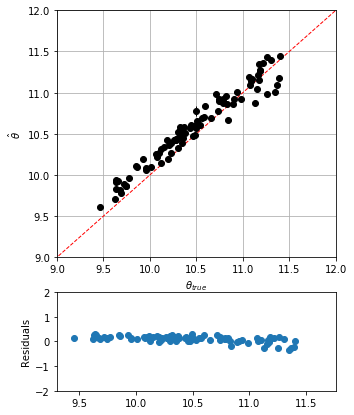

In [99]:
path = os.path.join(path_var,'mini_mocha','ispeculator','iSpeculator_validation/')

inferred = {}
inferred_up = {}
inferred_lo = {}
for i in range(96):
    dat = chain_data(40,path,i)
    try:
        dat.opener(pr = False)
        inferred[i], inferred_up[i], inferred_lo[i] = dat.return_data(0)
    except:
        print(f'error with igal {i}')
        inferred[i], inferred_up[i], inferred_lo[i] = -100000,-100000,-100000
#     print(i)


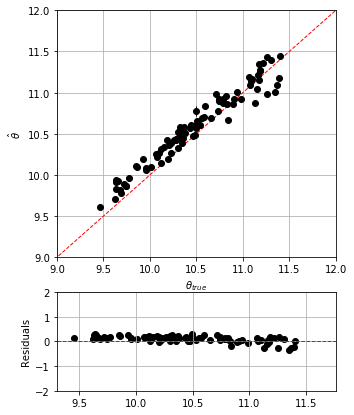

In [103]:

fig, axs = plt.subplots(2,1, figsize= (5,7), gridspec_kw={'height_ratios': (5,2)})
axs[0].grid()
axs[0].plot([0,100],[0,100], c = 'r', lw = 1, ls ='--')
axs[0].errorbar(input_mass[:i+1],list(inferred.values()),
             yerr = (list(inferred_up.values()),list(inferred_lo.values())),
             fmt = 'ok', elinewidth= 1) 
# lim1, lim2 = plt.xlim(min(list(input_mass[:i+1])),max(list(input_mass[:i+1])))
axs[0].set_ylabel('$\hat{\\theta}$')
axs[0].set_xlabel('$\\theta_{true}$')

axs[0].set_xlim(9,12)
axs[1].set_ylabel('Residuals')

axs[1].scatter(input_mass[:i+1],np.array(list(inferred.values()))-input_mass[:i+1], c = 'k')
axs[1].grid()
axs[1].axhline(0,lw = 1, c= 'r', ls = '--')
axs[0].set_ylim(9,12)
axs[1].set_ylim(-2,2)
plt.savefig('validation.pdf', format = 'pdf')
plt.show()